In [1]:
#https://medium.com/the-owl/algorithmic-trading-strategies-5c3b9d6ab618

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web
plt.style.use('fivethirtyeight')

In [2]:
goal = "ETH-USD"
df = web.DataReader(goal, 'yahoo')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-02,0.709204,0.675482,0.678783,0.687171,163326.0,0.687171
2015-10-03,0.693126,0.660716,0.686343,0.668379,103497.0,0.668379
2015-10-04,0.674438,0.624450,0.666784,0.628643,234263.0,0.628643
2015-10-05,0.653944,0.606230,0.622218,0.650645,262674.0,0.650645
2015-10-06,0.656301,0.602423,0.650515,0.609388,218327.0,0.609388


In [4]:
df.reset_index(level=0, inplace=True)

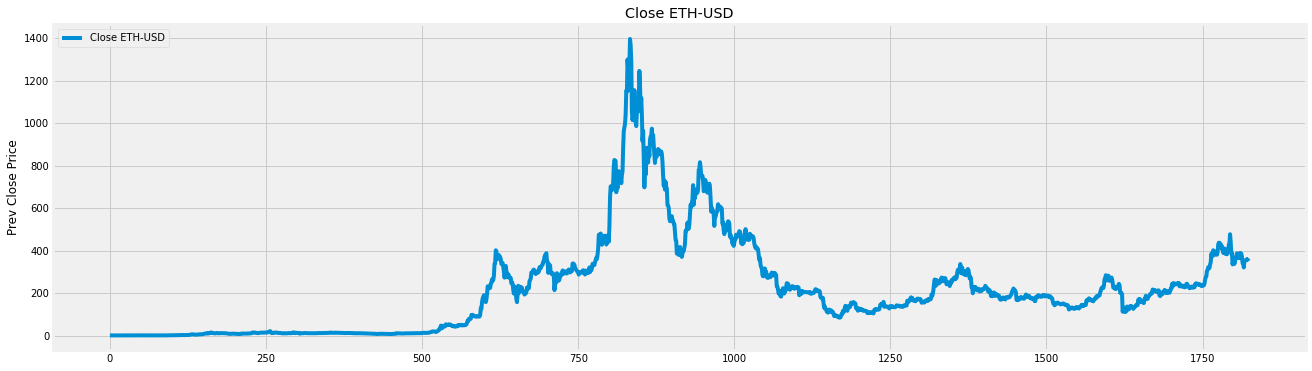

In [5]:
#Visualize the Data
plt.figure(figsize=(20,6))
plt.plot(df['Close'],label = 'Close ETH-USD')
plt.title('Close ETH-USD')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()

In [6]:
#Creating Simple Moving Average with 30-day Window
Sma30=pd.DataFrame()
Sma30['Prev Close Price']=df['Close'].rolling(window=30).mean()

#Creating Simple Moving Average with 100-day Window
Sma100=pd.DataFrame()
Sma100['Prev Close Price']=df['Close'].rolling(window=100).mean()

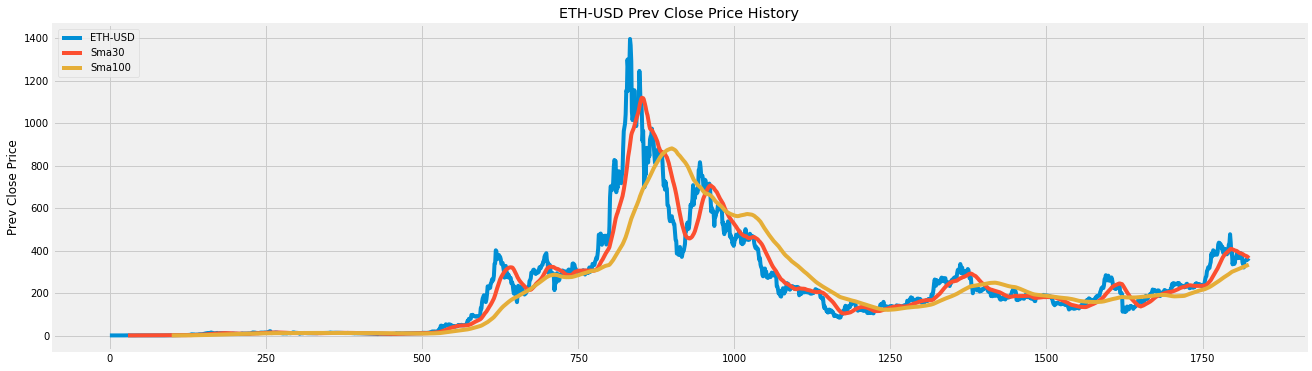

In [7]:
#Visualize to compare Moving Average
plt.figure(figsize=(20,6))
plt.plot(df['Close'],label = 'ETH-USD')
plt.plot(Sma30['Prev Close Price'],label = 'Sma30')
plt.plot(Sma100['Prev Close Price'],label = 'Sma100')
plt.title('ETH-USD Prev Close Price History')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()

In [8]:
#Creating a new dataframe to store all data
data=pd.DataFrame()
data['stock']=df['Close']
data['Sma30']=df['Close'].rolling(window=30).mean()
data['Sma100']=df['Close'].rolling(window=100).mean()

In [9]:
data.tail()

,stock,Sma30,Sma100
1820,357.321686,374.618087,328.668795
1821,354.950500,373.119054,329.946917
1822,359.963409,370.837977,331.253808
1823,360.022369,368.336065,332.564134
1824,364.069611,364.569988,333.779498


In [10]:
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1


  for i in range(len(data)):
    if data['Sma30'][i]>data['Sma100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['stock'][i])
        sigPriceSell.append(np.nan)
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['Sma30'][i]<data['Sma100'][i]:
      if flag != 0 :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['stock'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)


  return(sigPriceBuy,sigPriceSell)

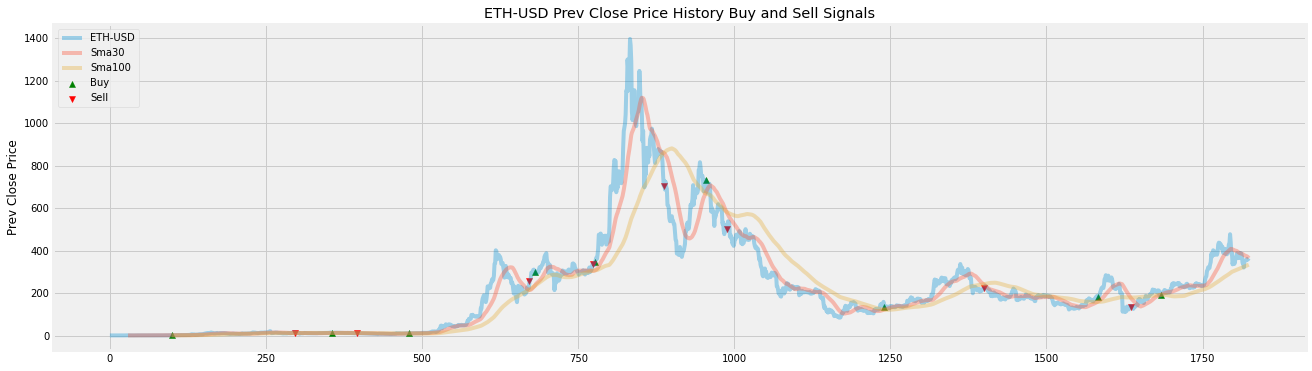

In [13]:
buy_or_sell = buy_sell(data)
data['Buy_Signal_Price']=buy_or_sell[0]
data['Sell_Signal_Price']=buy_or_sell[1]

#Visualize the Data
plt.figure(figsize=(20,6))
plt.plot(df['Close'],label = 'ETH-USD',alpha=0.35)
plt.plot(Sma30['Prev Close Price'],label = 'Sma30' ,alpha=0.35)
plt.plot(Sma100['Prev Close Price'],label = 'Sma100' ,alpha=0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='red')
plt.title('ETH-USD Prev Close Price History Buy and Sell Signals')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()